# Exploring Weather and Locations with APIs in Jupyter Notebook

## Introduction


In today's data-driven world, APIs (Application Programming Interfaces) serve as the foundation for integrating various services and data sources into our applications. This Jupyter Notebook project embarks on a fascinating journey, showcasing the power of APIs by leveraging two prominent ones: the OpenWeather API and the Google Maps API.

In [127]:
# importing dependencies
import pandas as pd
import matplotlib
import folium
from folium.plugins import HeatMap, MiniMap
import numpy as np
import googlemaps
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime as dt
from datetime import datetime, timezone
import requests
from bs4 import BeautifulSoup

   ## OpenWEATHER API
Weather profoundly influences our daily lives and activities. The OpenWeather API provides real-time access to weather data from around the globe. By tapping into this API, we can retrieve current weather conditions, forecasts, and historical data, enabling us to gain insights into atmospheric dynamics and patterns.

In [2]:
WEATHER_API_KEY = open('openWeather_api_key.txt', 'r').read()

In [3]:
# get latitude and longitude coordinates from Moroccan city's name
# adding the code for the Country (MA) is necessary as city names are not necessarily unique
# for example 'Sidi Bouzid' is a city in Tunisia as well as in Morocco
# adding the country code ensure that the city if found is indeed in Morocco
# this function will return an empty array if the city is not found
def name_to_coordinates(name):
    COORDINATES_BASE_URL = "http://api.openweathermap.org/geo/1.0/direct?q="+name+",MA&appid=" + WEATHER_API_KEY 
    result = requests.get(COORDINATES_BASE_URL).json()
    
    coordinates = []
    for location in result:
        coordinates.append([location["lat"], location["lon"]])
    return(coordinates)

**note:**
openWeather API service provides a Built-in API request by city name, but I chose the coordinates as requesting API calls by geographical coordinates is the most accurate way to specify any location. Searching by name still remains possible as openWeather provides another feature **Geocoding API** that converts city names to geo coordinates, which is used in the above function `name_to_coordinates()`


In [4]:
# getting the coordinates of the city of Marrakech as an example
marrakech_coordinates = name_to_coordinates("Marrakech")
marrakech_coordinates

[[31.6258257, -7.9891608]]

openWeather API response for Current Weather Data is provides Multilingual support. The list of supported languages is the following

In [5]:
language_codes = {
    "Afrikaans": "af",
    "Albanian": "al",
    "Arabic": "ar",
    "Azerbaijani": "az",
    "Bulgarian": "bg",
    "Catalan": "ca",
    "Czech": "cz",
    "Danish": "da",
    "German": "de",
    "Greek": "el",
    "English": "en",
    "Basque": "eu",
    "Persian (Farsi)": "fa",
    "Finnish": "fi",
    "French": "fr",
    "Galician": "gl",
    "Hebrew": "he",
    "Hindi": "hi",
    "Croatian": "hr",
    "Hungarian": "hu",
    "Indonesian": "id",
    "Italian": "it",
    "Japanese": "ja",
    "Korean": "kr",
    "Latvian": "la",
    "Lithuanian": "lt",
    "Macedonian": "mk",
    "Norwegian": "no",
    "Dutch": "nl",
    "Polish": "pl",
    "Portuguese": "pt",
    "Português Brasil": "pt_br",
    "Romanian": "ro",
    "Russian": "ru",
    "Swedish": "sv, se",
    "Slovak": "sk",
    "Slovenian": "sl",
    "Spanish": "sp, es",
    "Serbian": "sr",
    "Thai": "th",
    "Turkish": "tr",
    "Ukrainian": "ua, uk",
    "Vietnamese": "vi",
    "Chinese Simplified": "zh_cn",
    "Chinese Traditional": "zh_tw",
    "Zulu": "zu"
}

In [6]:
# getting the current weather of a given place based on its name
def weather(name, language):
    try:
        lat, lon = name_to_coordinates(name)[0][0],name_to_coordinates(name)[0][1]
        try:
            lang = language_codes[language]
            WEATHER_BASE_URL = "https://api.openweathermap.org/data/2.5/weather?lat="+\
            str(lat)+"&lon="+str(lon)+"&appid="+WEATHER_API_KEY+ "&lang=" + lang
            data = requests.get(WEATHER_BASE_URL).json()
            return data
        except KeyError:
            print(f"the language: {language} is not found!")
    except IndexError:
        return False

In [7]:
# getting the current data information for Chefchaouen in Arabic
weather("Chefchaouen", "Arabic")

{'coord': {'lon': -5.2767, 'lat': 35.1701},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'غيوم قاتمة',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 292.68,
  'feels_like': 292.33,
  'temp_min': 292.68,
  'temp_max': 292.68,
  'pressure': 1008,
  'humidity': 63,
  'sea_level': 1008,
  'grnd_level': 948},
 'visibility': 10000,
 'wind': {'speed': 1.38, 'deg': 148, 'gust': 2.39},
 'clouds': {'all': 89},
 'dt': 1693729146,
 'sys': {'type': 1,
  'id': 2415,
  'country': 'MA',
  'sunrise': 1693720497,
  'sunset': 1693766802},
 'timezone': 3600,
 'id': 2553455,
 'name': 'شفشاون',
 'cod': 200}

### JSON format API response fields

- **Coordinates**
  - Longitude: `coord.lon`
  - Latitude: `coord.lat`

- **Weather**
  - Weather Condition ID: `weather.id`
  - Weather Main Group: `weather.main`
  - Weather Description: `weather.description`
  - Weather Icon ID: `weather.icon`

- **Base**: `base`

- **Main Parameters**
  - Temperature: `main.temp` (Kelvin)
  - Feels Like: `main.feels_like` (Kelvin)
  - Atmospheric Pressure (Sea Level): `main.pressure` (hPa)
  - Humidity: `main.humidity` (%)
  - Min Temperature: `main.temp_min` (Kelvin)
  - Max Temperature: `main.temp_max` (Kelvin)
  - Atmospheric Pressure (Sea Level): `main.sea_level` (hPa)
  - Atmospheric Pressure (Ground Level): `main.grnd_level` (hPa)
  - Visibility: `visibility` (meters)

- **Wind**
  - Wind Speed: `wind.speed` (meter/sec)
  - Wind Direction: `wind.deg` (degrees)
  - Wind Gust: `wind.gust` (meter/sec)

- **Clouds**
  - Cloudiness: `clouds.all` (%)

- **Rain**
  - Rain Volume (1 hour): `rain.1h` (mm)
  - Rain Volume (3 hours): `rain.3h` (mm)

- **Snow**
  - Snow Volume (1 hour): `snow.1h` (mm)
  - Snow Volume (3 hours): `snow.3h` (mm)

- **Time**
  - Data Calculation Time: `dt` (unix, UTC)

- **System**
  - System Type: `sys.type`
  - System ID: `sys.id`
  - System Message: `sys.message`
  - Country Code: `sys.country`
  - Sunrise Time: `sys.sunrise` (unix, UTC)
  - Sunset Time: `sys.sunset` (unix, UTC)

- **Other Parameters**
  - Timezone Shift: `timezone` (seconds from UTC)
  - City ID: `id`
  - City Name: `name`
  - Internal Code: `cod`


## Creating a DataFrame of Current Weather Information of all the cities of Morocco

I managed to retrieve all the cities of Morocco from this [wikipedia page](https://fr.wikipedia.org/wiki/Liste_des_villes_du_Maroc) using `BeautifulSoup` library to parse the html.

In [8]:
# list of Moroccan Cities

url = "https://fr.wikipedia.org/wiki/Liste_des_villes_du_Maroc"

response = requests.get(url)
html_content = response.text

soup = BeautifulSoup(html_content, 'html.parser')

ul_elements = soup.find_all("ul")
names = []
moroccan_cities = []
start = False
for ul in ul_elements:
    li_elemnt= ul.find_all("li")
    stop = False
    for li in li_elemnt:
        city_name = li.get_text(strip=True).split("[")[0]
        if city_name == "Afourar": # first city to start the adding of city names
            start = True
        if start:
            if '[' in li.get_text(strip=True) and li.get_text(strip=True)[0] != '[':
                moroccan_cities.append(li.get_text(strip=True).split("[")[0])
                if city_name == "Zrarda": #last city to stop the adding of city names
                    stop = True
    if stop:
        break

the list still needs some more cleaning, it appears that there are some cities with the same name
there 2 cases: 
1. Ajdir (province d'Al Hoceïma) and Ajdir (province de Taza) 
2. Karia (province d'El Jadida) and Karia (province de Tétouan) 
* Karia (province de Tétouan) is known as just Karia or Jbel Lahbib. 
* Karia (province d'El jadida) I couldn't find a name recognized by openWeather nor could I find it on the Geographic coordinate system, so I will just keep the first one and rename it Jbel Lahbib.
* for Ajdir (taza et el Hoceima), I will use the same name Ajdir


In [9]:
moroccan_cities[moroccan_cities.index("Ajdir (province d'Al Hoceïma)")] = "Ajdir"
moroccan_cities.remove("Ajdir (province de Taza)")
moroccan_cities[moroccan_cities.index("Karia (province de Tétouan)")] = "Karia"
moroccan_cities.remove("Karia (province d'El Jadida)")

print("total number of cities found is:", len(moroccan_cities))

total number of cities found is: 345


In [10]:
# remove duplicates if they are there:
moroccan_cities = list(set(moroccan_cities))
print("total number of cities after removing duplicates is:", len(moroccan_cities))

total number of cities after removing duplicates is: 345


In [11]:
# first let's create a function to convert timestamp
# note the TimeZone Shift provided in the json response is the shift in seconds from UTC time
def unix_timestamp_to_time(unix_timestamp, shift):
    time = datetime.fromtimestamp(unix_timestamp+shift, tz=timezone.utc)
    return time.strftime('%Y-%m-%d %H:%M:%S')

# convert the temprature from Kelvin to Celsius
def Kelvin_to_Celsius(temp):
    return temp - 273.15

In [12]:
# retrieveing current weather data for each city

# list to hold the weather data for all cities
cities_data = []
failed_cities = []
language = "English" 
# retrieval 
print(" Data retrieval has started        \n----------------------------------")
city_count = 1 
collection_count = 1

for i, city in enumerate(moroccan_cities):
    if (i%50 ==0 and i>=50):
        collection_count +=1
        city_count = 1
        time.sleep(15)
    try:
        if (weather(city, language) != False):
            city_weather = weather(city,language)
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_weather_description = city_weather["weather"][0]["description"]
            city_max_temp = Kelvin_to_Celsius(city_weather["main"]["temp_max"])
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"] + ", Morocco."
            city_date = unix_timestamp_to_time(city_weather["dt"], city_weather["timezone"])
            city_sunrise = unix_timestamp_to_time(city_weather['sys']["sunrise"], city_weather["timezone"])
            city_sunset = unix_timestamp_to_time(city_weather['sys']["sunset"], city_weather["timezone"])
        
            cities_data.append({
            "City": city,
            "Lat": city_lat,
            "long": city_lng,
            "Max temp °C": city_max_temp,
            "Humidity %": city_humidity,
            "Cloudiness %": city_clouds,
            "Wind m/s": city_wind,
            "Country": city_country,
            "Sunrise Time (local time)": city_sunrise,
            "Sunset Time (local time)": city_sunset,
            "Date and Time (local time)": city_date
            })
            print(f"Processing City number {city_count} of Collection {collection_count} | {city}")
            city_count +=1
        else:
            print(f"failed to retrieve the data for the city of {city}")
            failed_cities.append(city)
            pass
    except:
        failed_cities.append(city)
        pass

print("----------------------------------")
print("Data Retrieval Complete           ")
print("----------------------------------")

 Data retrieval has started        
----------------------------------
Processing City number 1 of Collection 1 | Zaouïat Cheikh
Processing City number 2 of Collection 1 | Kerrouchen
Processing City number 3 of Collection 1 | Zagora
Processing City number 4 of Collection 1 | El Marsa
Processing City number 5 of Collection 1 | Tendrara
Processing City number 6 of Collection 1 | Arbaoua
Processing City number 7 of Collection 1 | Lqliaa
Processing City number 8 of Collection 1 | El Hajeb
failed to retrieve the data for the city of Oulad Teïma
Processing City number 9 of Collection 1 | Tabounte
failed to retrieve the data for the city of Sidi Hajjaj Oulad Mrah
Processing City number 10 of Collection 1 | Aourir
Processing City number 11 of Collection 1 | Boumia
Processing City number 12 of Collection 1 | Boumalne Dadès
Processing City number 13 of Collection 1 | Laakarta
Processing City number 14 of Collection 1 | El Mansouria
Processing City number 15 of Collection 1 | Oued Zem
Processing 

In [13]:
cities_data_copie = cities_data #copying our list (avoid regenerating it, if potential refactor goes wrong)
failed_cities

['Oulad Teïma',
 'Sidi Hajjaj Oulad Mrah',
 'Haj Kaddour',
 'Sidi Rahhal Chataï',
 'Boujdour',
 'Jaadar',
 'Sid Zouin',
 'Lbir Jdid',
 'Tafrisset',
 'Touima',
 'Lakouablia',
 'Sebt El Maarif',
 'Oulad Yaïch',
 'Amalou Ighriben',
 'Es-Semara',
 'Ouezzane',
 'Dar Bni Karrich',
 'Aïn Erreggada',
 'Kerouna',
 'Kattara',
 'Bouzthate ',
 'Aït Melloul',
 'Sidi Ali Ban Hamdouche',
 'Ihddaden',
 'Fquih Ben Salah',
 'Kehf Nsour',
 'Sebt El Guerdane',
 'Moulay Driss Zerhoun',
 'Skhour Rehamna',
 'Massa']

cities shown above, are the cities where we failed to record the data weather, I suspected that alternative names might get us the result, for example **fkih ben salah** instead of **Fquih Ben Salah**, after investigating I updated the names of failed cities to this

In [14]:
refecatored_failed_cities = ['Ihaddaden', 'Ouazzane','Sidi Ali Ben Hamdouche','Tarcha',
 'Kourouna','Ouled Yaïch','Kaf Nsour','Boujdour','Kettara',
 'Smara', 'Ouled Teïma', 'Sidi Chiker', 'Kridid', 'Bni Bouifrour','bir Jdid',
 'Bni Karrich', 'Sidi Zouine', 'Ain Leuh', 'Bouarg', 'Skhour Rhamna',
 'My Brahim', 'Fkih Ben Salah', 'Sidi Rahal Chatai', 'Sebt Guerdane',
 'Sidi Hajjaj', 'Tafersit', 'Haj Kadour', 'Moulay Idriss Zerhoun']

In [15]:
refactored_city_count = 1
refactored_cities_data = [] #holding data here, as to make sure everything goes good before adding it to cities_data
for i, city in enumerate(refecatored_failed_cities):
            city_weather = weather(city,language)
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_weather_description = city_weather["weather"][0]["description"]
            city_max_temp = Kelvin_to_Celsius(city_weather["main"]["temp_max"])
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"].get("country", "MA") + ", Morocco."
            city_date = unix_timestamp_to_time(city_weather["dt"], city_weather["timezone"])
            city_sunrise = unix_timestamp_to_time(city_weather['sys']["sunrise"], city_weather["timezone"])
            city_sunset = unix_timestamp_to_time(city_weather['sys']["sunset"], city_weather["timezone"])
        
            refactored_cities_data.append({
            "City": city,
            "Lat": city_lat,
            "long": city_lng,
            "Max temp °C": city_max_temp,
            "Humidity %": city_humidity,
            "Cloudiness %": city_clouds,
            "Wind m/s": city_wind,
            "Country": city_country,
            "Sunrise Time (local time)": city_sunrise,
            "Sunset Time (local time)": city_sunset,
            "Date and Time (local time)": city_date
            })
            print(f"Processing City number {refactored_city_count} of refactored failed cities | {city}")
            refactored_city_count +=1
            
print("----------------------------------")
print("Data Retrieval Complete           ")
print("----------------------------------")

Processing City number 1 of refactored failed cities | Ihaddaden
Processing City number 2 of refactored failed cities | Ouazzane
Processing City number 3 of refactored failed cities | Sidi Ali Ben Hamdouche
Processing City number 4 of refactored failed cities | Tarcha
Processing City number 5 of refactored failed cities | Kourouna
Processing City number 6 of refactored failed cities | Ouled Yaïch
Processing City number 7 of refactored failed cities | Kaf Nsour
Processing City number 8 of refactored failed cities | Boujdour
Processing City number 9 of refactored failed cities | Kettara
Processing City number 10 of refactored failed cities | Smara
Processing City number 11 of refactored failed cities | Ouled Teïma
Processing City number 12 of refactored failed cities | Sidi Chiker
Processing City number 13 of refactored failed cities | Kridid
Processing City number 14 of refactored failed cities | Bni Bouifrour
Processing City number 15 of refactored failed cities | bir Jdid
Processing C

In [16]:
print(f"Out of the 345 original cities, we were able to retrieve the current weather data of {len(cities_data_copie)+len(refactored_cities_data)} cities")

Out of the 345 original cities, we were able to retrieve the current weather data of 343 cities


In [17]:
cities_data_copie.extend(refactored_cities_data) # merging the two lists together

In [18]:
weather_df = pd.DataFrame(cities_data_copie) # converting our list to a dataframe
weather_df.head(10)

,City,Lat,long,Max temp °C,Humidity %,Cloudiness %,Wind m/s,Country,Sunrise Time (local time),Sunset Time (local time),Date and Time (local time)
0,Zaouïat Cheikh,32.6442,-5.9166,16.64,72,100,0.73,"MA, Morocco.",2023-09-03 06:59:37,2023-09-03 19:47:09,2023-09-03 09:19:14
1,Kerrouchen,32.8001,-5.3220,14.85,65,100,0.45,"MA, Morocco.",2023-09-03 06:57:07,2023-09-03 19:44:54,2023-09-03 09:19:16
2,Zagora,30.3280,-5.8371,24.40,36,97,4.01,"MA, Morocco.",2023-09-03 07:01:07,2023-09-03 19:45:01,2023-09-03 09:19:19
3,El Marsa,27.0930,-13.4092,22.39,100,75,2.57,"EH, Morocco.",2023-09-03 07:33:49,2023-09-03 20:12:53,2023-09-03 09:19:22
4,Tendrara,33.0494,-2.0001,17.21,73,100,2.95,"MA, Morocco.",2023-09-03 06:43:37,2023-09-03 19:31:50,2023-09-03 09:19:24
5,Arbaoua,34.9082,-5.9375,21.03,68,61,3.23,"MA, Morocco.",2023-09-03 06:57:49,2023-09-03 19:49:07,2023-09-03 09:19:27
6,Lqliaa,30.2987,-9.4620,20.11,94,40,0.00,"MA, Morocco.",2023-09-03 07:15:39,2023-09-03 19:59:29,2023-09-03 09:19:29
7,El Hajeb,33.6902,-5.3719,16.29,53,96,2.53,"MA, Morocco.",2023-09-03 06:56:35,2023-09-03 19:45:50,2023-09-03 09:19:32
8,Tabounte,30.8965,-6.9073,22.03,26,40,5.14,"MA, Morocco.",2023-09-03 07:04:58,2023-09-03 19:49:44,2023-09-03 09:19:35
9,Aourir,30.4981,-9.6711,20.37,73,97,3.59,"MA, Morocco.",2023-09-03 07:16:20,2023-09-03 20:00:28,2023-09-03 09:19:38


In [19]:
# reordering the columns for better visibility
reordered_columns = ["City", "Country", "Date and Time (local time)", "Lat", 
                     "long", "Max temp °C", "Humidity %", "Cloudiness %", "Wind m/s", 
                     "Sunrise Time (local time)", "Sunset Time (local time)" ]
weather_df = weather_df[reordered_columns]
weather_df.rename(columns= {'long':'Long'}, inplace=True)
weather_df.head(10)

,City,Country,Date and Time (local time),Lat,Long,Max temp °C,Humidity %,Cloudiness %,Wind m/s,Sunrise Time (local time),Sunset Time (local time)
0,Zaouïat Cheikh,"MA, Morocco.",2023-09-03 09:19:14,32.6442,-5.9166,16.64,72,100,0.73,2023-09-03 06:59:37,2023-09-03 19:47:09
1,Kerrouchen,"MA, Morocco.",2023-09-03 09:19:16,32.8001,-5.3220,14.85,65,100,0.45,2023-09-03 06:57:07,2023-09-03 19:44:54
2,Zagora,"MA, Morocco.",2023-09-03 09:19:19,30.3280,-5.8371,24.40,36,97,4.01,2023-09-03 07:01:07,2023-09-03 19:45:01
3,El Marsa,"EH, Morocco.",2023-09-03 09:19:22,27.0930,-13.4092,22.39,100,75,2.57,2023-09-03 07:33:49,2023-09-03 20:12:53
4,Tendrara,"MA, Morocco.",2023-09-03 09:19:24,33.0494,-2.0001,17.21,73,100,2.95,2023-09-03 06:43:37,2023-09-03 19:31:50
5,Arbaoua,"MA, Morocco.",2023-09-03 09:19:27,34.9082,-5.9375,21.03,68,61,3.23,2023-09-03 06:57:49,2023-09-03 19:49:07
6,Lqliaa,"MA, Morocco.",2023-09-03 09:19:29,30.2987,-9.4620,20.11,94,40,0.00,2023-09-03 07:15:39,2023-09-03 19:59:29
7,El Hajeb,"MA, Morocco.",2023-09-03 09:19:32,33.6902,-5.3719,16.29,53,96,2.53,2023-09-03 06:56:35,2023-09-03 19:45:50
8,Tabounte,"MA, Morocco.",2023-09-03 09:19:35,30.8965,-6.9073,22.03,26,40,5.14,2023-09-03 07:04:58,2023-09-03 19:49:44
9,Aourir,"MA, Morocco.",2023-09-03 09:19:38,30.4981,-9.6711,20.37,73,97,3.59,2023-09-03 07:16:20,2023-09-03 20:00:28


In [20]:
# saving our findings
data_file = "Weather_Data/cities_weather.csv"
weather_df.to_csv(data_file, index_label="ID")

## Data Exploration

In [21]:
lats = weather_df["Lat"]
max_temperature = weather_df["Max temp °C"]
humidity = weather_df["Humidity %"]
cloudiness = weather_df["Cloudiness %"]
wind = weather_df["Wind m/s"]


### scatter plot Latitude vs. Max Temperature

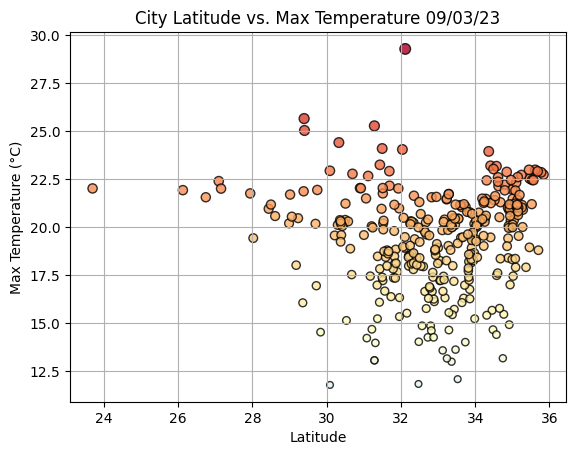

In [22]:
marker_size = np.array(weather_df["Max temp °C"]) * 2 # size of the dots (get bigger the hotter the city)
norm_temp = np.array(weather_df["Max temp °C"])/max(weather_df["Max temp °C"])
colors = plt.cm.RdYlBu_r(norm_temp)
plt.scatter(lats,
            max_temperature,
            edgecolor="black", linewidths=1, marker="o",
            s=marker_size, c=colors, alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/lat_vs_temp.png")


### scatter plot Humidity vs. Max Temperature

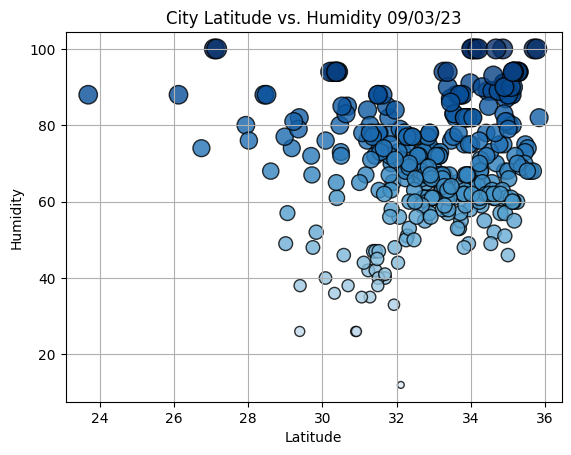

In [23]:
marker_size = np.array(weather_df["Humidity %"]) * 2 # size of the dots (get bigger the hotter the city)
norm_humd = np.array(weather_df["Humidity %"])/max(weather_df["Humidity %"])
colors = plt.cm.Blues(norm_humd)
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            s=marker_size, c=colors, alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/humdity_vs_temp.png")

### scatter plot Cloudiness vs. Max Temperature


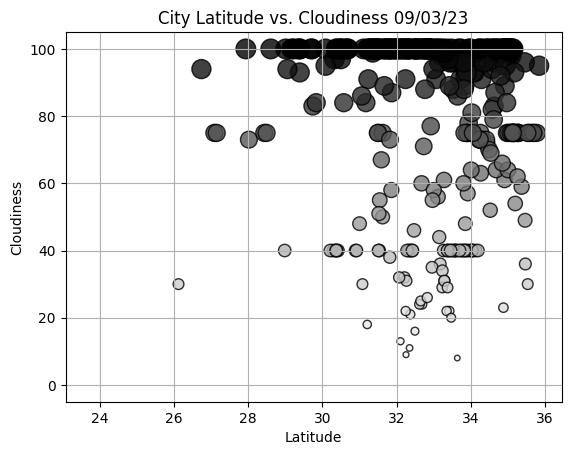

In [24]:
marker_size = np.array(weather_df["Cloudiness %"]) * 2 # size of the dots (get bigger the hotter the city)
norm_cld = np.array(weather_df["Cloudiness %"])/max(weather_df["Cloudiness %"])
colors = plt.cm.Greys(norm_cld)
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            s=marker_size, c=colors, alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/cloudiness_vs_temp.png")

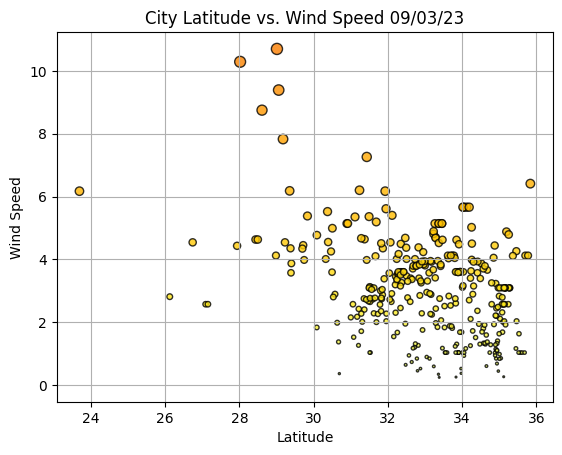

In [25]:
marker_size = np.array(weather_df["Wind m/s"]) * 6 # size of the dots (get bigger the hotter the city)
norm_wind = np.array(weather_df["Wind m/s"])/max(weather_df["Wind m/s"])
colors = plt.cm.Wistia(norm_wind)
plt.scatter(lats,
            wind,
            edgecolor="black", linewidths=1, marker="o",
            s=marker_size, c=colors, alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/wind_vs_temp.png")

### Introduction to Linear Regression

Linear regression is a statistical method employed to unveil connections between a dependent variable and one or more independent variables. Its essence lies in unraveling how one variable relies on another.

Imagine, for instance, we seek to comprehend how advertising spending influences product sales. In this scenario, we'd apply linear regression to explore the link between advertising expenditure (the independent variable) and product sales (the dependent variable). Our presumption would be that as advertising spending increases, sales also experience a corresponding boost. Further insights into hypothesis testing and model development will be covered in subsequent modules.

#### Simple Linear Regression

Simple linear regression is the most basic form of linear regression and involves a single independent variable. The relationship between the independent variable $X$ and the dependent variable $Y$ can be expressed by the equation of a straight line:

$$ Y = b + mX$$

Where:
- $Y$ is the dependent variable (target).
- $X$ is the independent variable (predictor).
- $b$ is the intercept, representing the value of $Y$ when $X$ is 0.
- $m$ is the slope, indicating the change in $Y$ for a unit change in $X$.


To preform linear regression in Python, we will use the function `linregress` from the library `scipy.stats`   
The `linregress` function takes only two arguments, the x- and y-axes data in the form of arrays.  
And it returns the following:

- **Slope of the regression line** as slope
- **y-intercept** as intercept
- **Correlation coefficient** as r_value
- **p-value** as p_value
- **Standard error** as std_err

In this project we aim to repeat our linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = weather_df.loc[(weather_df["Lat"] >= 0)]
southern_hemi_df = weather_df.loc[(weather_df["Lat"] < 0)]

southern_hemi_df.head() 

,City,Country,Date and Time (local time),Lat,Long,Max temp °C,Humidity %,Cloudiness %,Wind m/s,Sunrise Time (local time),Sunset Time (local time)


the southern hemisphere dataframe is empty, which is only logical. Morocco exits within the northern hemisphere as you can see below.
![eath_hemispheres](https://images.interestingengineering.com/img/iea/4N61K1lKOJ/earth-hemispheres.jpg)
![morocco_on_map](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/LocationMorocco.svg/1280px-LocationMorocco.svg.png)

#### Perform Linear Regression on the Maximum Temperature

0.027271907230047517

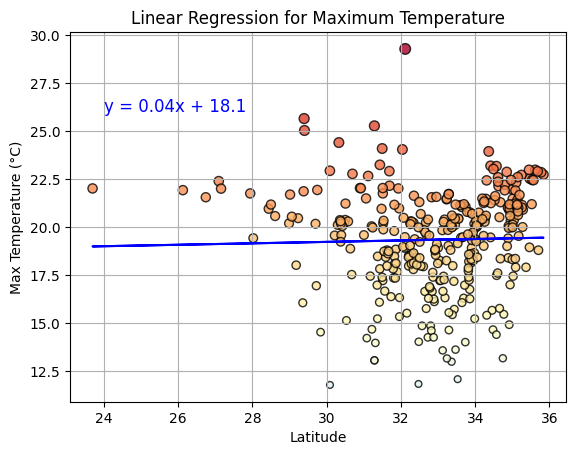

In [33]:
y_values = weather_df["Max temp °C"]
x_values = weather_df["Lat"]
marker_size = np.array(y_values) * 2 # size of the dots (get bigger the hotter the city)
norm_temp = np.array(y_values)/max(y_values)
colors = plt.cm.RdYlBu_r(norm_temp)
plt.scatter(lats,
            max_temperature,
            edgecolor="black", linewidths=1, marker="o",
            s=marker_size, c=colors, alpha=0.8, label="Cities")
plt.grid(True)

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (24,26), fontsize=12, color="blue")
plt.plot(x_values,regress_values,"blue")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.title("Linear Regression for Maximum Temperature")
plt.savefig("weather_data/lr_lat_vs_temp.png")
r_value

The **r_value** found is 0.03, which shows a really weak correlation between the latitude and the max temperature. This weak correlation also suggests that other factors might be in play!

0.13432935835383303

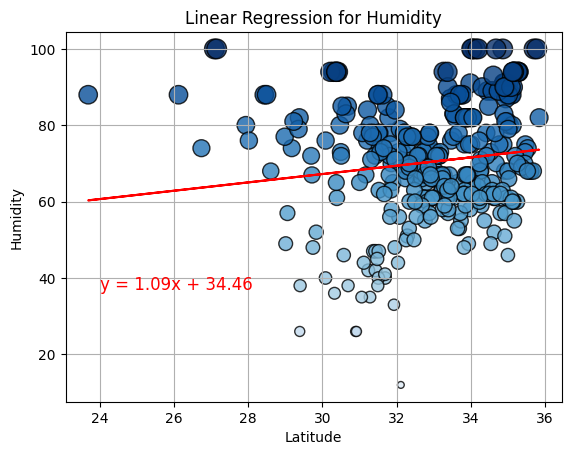

In [34]:
y_values = weather_df["Humidity %"]
marker_size = np.array(y_values) * 2 # size of the dots (get bigger the hotter the city)
norm_humd = np.array(y_values)/max(y_values)
colors = plt.cm.Blues(norm_humd)
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            s=marker_size, c=colors, alpha=0.8, label="Cities")
plt.grid(True)
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (24,37), fontsize=12, color="red")
plt.plot(x_values,regress_values,"red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("Linear Regression for Humidity")
plt.savefig("weather_data/lr_humdity_vs_temp.png")
r_value



In [29]:
r_value

0.13432935835383303

The value of 0.13 indicates a weak positive correlation, which means that as latitudes increase (move away from the equator), humidity tends to increase as well. This suggests that there is some tendency for humidity to be higher in cities further from the equator.  
However the relatively weak magnitude of the r-value suggests that other factors might also influence humidity levels in these cities.

0.03245384477227181

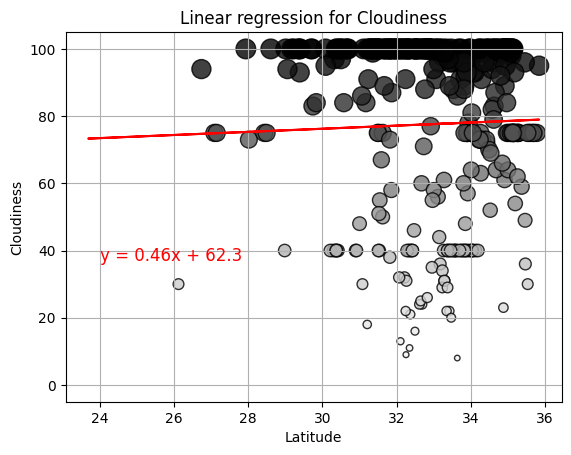

In [35]:
y_values = weather_df["Cloudiness %"]
marker_size = np.array(y_values) * 2 # size of the dots (get bigger the hotter the city)
norm_cld = np.array(y_values)/max(y_values)
colors = plt.cm.Greys(norm_cld)
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            s=marker_size, c=colors, alpha=0.8, label="Cities")
plt.grid(True)
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (24,37), fontsize=12, color="red")
plt.plot(x_values,regress_values,"red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("Linear regression for Cloudiness")
plt.savefig("weather_data/lr_cloudiness_vs_temp.png")
r_value

the **r_value** is 0.03, it's a very low correlation. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness.

-0.33219714285036783

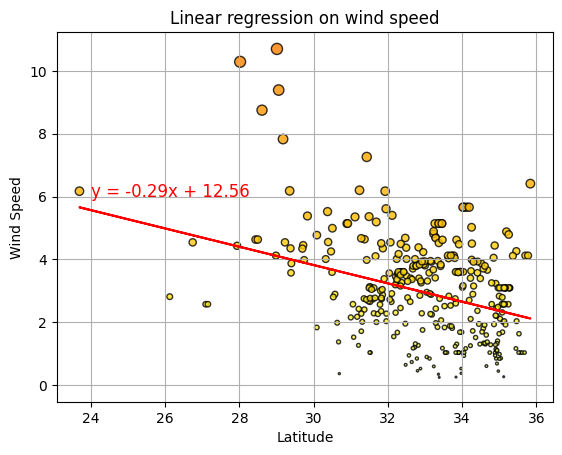

In [36]:
y_values = weather_df["Wind m/s"]
marker_size = np.array(y_values) * 6 # size of the dots (get bigger the hotter the city)
norm_wind = np.array(y_values)/max(y_values)
colors = plt.cm.Wistia(norm_wind)
plt.scatter(lats,
            wind,
            edgecolor="black", linewidths=1, marker="o",
            s=marker_size, c=colors, alpha=0.8, label="Cities")
plt.grid(True)
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (24,6), fontsize=12, color="red")
plt.plot(x_values,regress_values,"red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title("Linear regression on wind speed")
plt.savefig("weather_data/lr_wind_vs_temp.png")
r_value

the **r_value** is -0.-0.33 which indicates a moderate negative correlation. IT suggests that there is a discernible pattern: as you move away from the equator and towards higher latitudes in Moroccan cities, the wind speed tends to decrease.

## CREATING MAPS OF WEATHER PARAMETERS

I'll be using the library `folium` to generate maps for each weather parameter

### Cities Data Map

In [106]:
m = folium.Map(location=[31.7917,-7.0926], zoom_start=10)
for index, row in weather_df.iterrows():
    max_temp_formatted = f"{row['Max temp °C']:.2f}"
    popup_html = f"""
    <table style="width:100%">
      <tr>
        <td><strong>City</strong></td>
        <td>{row['City']}</td>
      </tr>
      <tr>
        <td><strong>Max temp °C</strong></td>
        <td>{max_temp_formatted}</td>
      </tr>
      <tr>
        <td><strong>Humidity %</strong></td>
        <td>{row['Humidity %']}</td>
      </tr>
      <tr>
        <td><strong>Cloudiness %</strong></td>
        <td>{row['Cloudiness %']}</td>
      </tr>
      <tr>
        <td><strong>Wind m/s</strong></td>
        <td>{row['Wind m/s']}</td>
      </tr>
      <tr>
        <td><strong>Country</strong></td>
        <td>{row['Country']}</td>
      </tr>
      <tr>
        <td><strong>Sunrise Time</strong></td>
        <td>{row['Sunrise Time (local time)']}</td>
      </tr>
      <tr>
        <td><strong>Sunset Time</strong></td>
        <td>{row['Sunset Time (local time)']}</td>
      </tr>
      <tr>
        <td><strong>Date and Time</strong></td>
        <td>{row['Date and Time (local time)']}</td>
      </tr>
    </table>
    """
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=folium.Popup(popup_html, max_width=300)
    ).add_to(m)
minimap = MiniMap(toggle_display=True, tile_layer="Stamen Toner", position="topright", width = 150, height= 150)
minimap.add_to(m)
display(m)

### Max Temperature Map

In [81]:
from folium.plugins import HeatMap
import matplotlib
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
weather_df['Normalized Max temp °C'] = scaler.fit_transform(weather_df[['Max temp °C']])
colormap = plt.cm.RdYlBu_r

def map_temperature_to_color(temperature):
    return matplotlib.colors.rgb2hex(colormap(temperature))

gradient = {
    0.0: map_temperature_to_color(0.0),
    0.25: map_temperature_to_color(0.25),
    0.5: map_temperature_to_color(0.5),
    0.75: map_temperature_to_color(0.75),   
    1.0: map_temperature_to_color(1.0)}
m = folium.Map(location=[31.2185,-8.2404],tiles="stamentoner",  zoom_start=5)
heatmap = folium.plugins.HeatMap(weather_df[["Lat", "Long", "Max temp °C"]], gradient=gradient)
heatmap.add_to(m)
display(m)


### Humidity Map

In [84]:
weather_df['Normalized humidity'] = (weather_df[['Humidity %']])/100
colormap = plt.cm.Blues

def humidity_to_color(humidity):
    return matplotlib.colors.rgb2hex(colormap(humidity))

gradient = {
    0.0: humidity_to_color(0.0),
    0.25: humidity_to_color(0.25),
    0.5: humidity_to_color(0.5),
    0.75: humidity_to_color(0.75),   
    1.0: humidity_to_color(1.0)}
m = folium.Map(location=[31.2185,-8.2404],tiles="stamentoner",  zoom_start=8)
heatmap = folium.plugins.HeatMap(weather_df[["Lat", "Long", "Normalized humidity"]], gradient=gradient)
heatmap.add_to(m)
display(m)

### Cloudiness Map

In [109]:
weather_df['Normalized cloudiness'] = (weather_df[['Cloudiness %']])/100
colormap = plt.cm.Greys

def cloudiness_to_color(cloudiness):
    return matplotlib.colors.rgb2hex(colormap(cloudiness))

gradient = {
    0.0: humidity_to_color(0.0),
    0.25: humidity_to_color(0.25),
    0.5: humidity_to_color(0.5),
    0.75: humidity_to_color(0.75),   
    1.0: humidity_to_color(1.0)}
m = folium.Map(location=[31.2185,-8.2404],tiles="stamentoner",  zoom_start=8)
heatmap = folium.plugins.HeatMap(weather_df[["Lat", "Long", "Normalized cloudiness"]], gradient=gradient)
heatmap.add_to(m)
display(m)

# Google Maps API
## Find a Hotel

we will filter out weather_df dataframe based on preferred temperatures, to then find the corresponding cities and use Google Maps API to find nearby hotels to these cities, and finally map these hotels using `folium`

In [124]:
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

In [125]:
# i'll use min_temp = 25, max_temp = 45 

preferred_cities_df = weather_df.loc[(weather_df["Max temp °C"] <= max_temp) & \
                                       (weather_df["Max temp °C"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date and Time (local time),Lat,Long,Max temp °C,Humidity %,Cloudiness %,Wind m/s,Sunrise Time (local time),Sunset Time (local time),Normalized Max temp °C,Normalized humidity,Normalized cloudiness
147,Oum El Guerdane,"MA, Morocco.",2023-09-03 09:27:09,29.4020,-7.7729,25.03,38,100,3.87,2023-09-03 07:09:34,2023-09-03 19:52:03,0.757282,0.38,1.00
225,Akka,"MA, Morocco.",2023-09-03 09:31:23,29.3919,-8.2568,25.65,26,93,3.57,2023-09-03 07:11:31,2023-09-03 19:53:58,0.792690,0.26,0.93
254,Figuig,"MA, Morocco.",2023-09-03 09:33:04,32.1150,-1.2304,29.28,12,100,5.40,2023-09-03 06:41:18,2023-09-03 19:28:00,1.000000,0.12,1.00
291,Moulay Ali Chérif,"MA, Morocco.",2023-09-03 09:35:08,31.2847,-4.2670,25.27,35,100,4.67,2023-09-03 06:54:06,2023-09-03 19:39:29,0.770988,0.35,1.00


In [138]:
GMAPS_API_KEY = open("gmaps_api_key.txt", 'r').read()
gmaps = googlemaps.Client(key=GMAPS_API_KEY)

hotel_dfs = []

for index, row in preferred_cities_df.iterrows():
    location = (row['Lat'], row['Long'])
    radius = 5000  # 5 kilometers (adjust as needed)

    places_result = gmaps.places_nearby(
        location=location,
        radius=radius,
        type='lodging'
    )

    hotels = []

    for place in places_result['results']:
        hotels.append({
            'City': row['City'],
            'Hotel Name': place['name'],
            'Hotel Address': place['vicinity'],
            'Hotel Rating': place.get('rating', 'N/A'),
            'Hotel Location': place['geometry']['location']
        })

    hotel_df = pd.DataFrame(hotels)

    hotel_dfs.append(hotel_df)

hotel_df = pd.concat(hotel_dfs, ignore_index=True)

hotel_df.head(10)


,City,Hotel Name,Hotel Address,Hotel Rating,Hotel Location
0,Akka,Riad ssolh,"9PVR+76, Akka",N/A,"{'lat': 29.39313739999999, 'lng': -8.259472399..."
1,Akka,Musée Cheikh Omar,Akka,4.2,"{'lat': 29.39673159999999, 'lng': -8.265108199..."
2,Akka,Complexe touristique Akka,"N12, Akka",3.9,"{'lat': 29.3893769, 'lng': -8.24235}"
3,Akka,Auberge Amande,"Douar Rahala Kasbat Sidi Abdellah Ben M'Barek,...",4,"{'lat': 29.4315055, 'lng': -8.2661077}"
4,Akka,Gîte Rahala,"Douar, P1803, Kasbat Sidi Abdellah Ben Mbarek",3.9,"{'lat': 29.4317037, 'lng': -8.265260099999999}"
5,Akka,CSR KASBAT SAM,"CPPQ+4XF, Kasbat Sidi Abdellah Ben M'Barek",3,"{'lat': 29.4351911, 'lng': -8.2598295}"
6,Akka,ايت أوتشواشت ناس الملاح,"CPPP+792, Unnamed Road, Kasbat Sidi Abdellah B...",N/A,"{'lat': 29.4356494, 'lng': -8.2641113}"
7,Akka,انرارن,"CPPP+8MQ, Unnamed Road, Kasbat Sidi Abdellah B...",N/A,"{'lat': 29.43583559999999, 'lng': -8.2632768}"
8,Figuig,Maison de Nanna,"722 rue Ouled Sellam, Ksar Zénaga",4.3,"{'lat': 32.1000679, 'lng': -1.2368289}"
9,Figuig,Dar Amane,"3QX8+4C8, Figuig",4.2,"{'lat': 32.09777800000001, 'lng': -1.2339216}"


In [146]:
m = folium.Map(location=[29.39, -8.26], zoom_start=13)
for index, row in hotel_df.iterrows():
    popup_html = f"<strong>Hotel Name:</strong> {row['Hotel Name']}<br><strong>City:</strong> {row['City']}<br><strong>Rating:</strong> {row['Hotel Rating']}"
    hotel_location = (row['Hotel Location']['lat'], row['Hotel Location']['lng'])
    folium.Marker(
        location=hotel_location,
        popup=folium.Popup(popup_html,max_width=300),
        icon=folium.Icon(icon='hotel', color='blue')
    ).add_to(m)
display(m)